# Semester project -- Part 2: Datasets

In [58]:
import pandas as pd
import sys
import ipyplot
sys.path.append("../src/")
from utils import *

# load no_issue_samples dataframe from csv
data = pd.read_csv('../data/raw_data/cleaned_data.csv')

# remove distractores
distractors = ['lactose', 'calcium-carbonate', 'starch-(maize)', 'ascorbic-acid']
data = data.loc[~data.sample_name.isin(distractors)]
print(f"Total of images {len(data)}")

Total of images 7644


## List of medicines (APIs) and  quantities

In [64]:
## List of medicines (APIs) and  quantities
medicines = data.sample_name.unique()
quantities = data.quantity.unique()

print(f"Medicines:\n{medicines}\n")
print(f"Quantities:\n{quantities}")

Medicines:
['amoxicillin' 'chloroquine' 'hydroxychloroquine'
 'promethazine-hydrochloride' 'ampicillin' 'albendazole' 'ciprofloxacin'
 'benzyl-penicillin' 'isoniazid' 'tetracycline' 'ceftriaxone'
 'sulfamethoxazole' 'doxycycline' 'epinephrine' 'ethambutol'
 'ferrous-sulfate' 'rifampicin' 'pyrazinamide' 'azithromycin' 'ripe']

Quantities:
[100  80  50  20]


## Number of images by medicine

In [65]:
# Number of images by medicine
medicine_images_counter = data.sample_name.value_counts().reset_index(name='counts')
medicine_images_counter

,index,counts
0,hydroxychloroquine,821
1,rifampicin,476
2,ciprofloxacin,455
3,pyrazinamide,447
4,chloroquine,438
5,azithromycin,438
6,ferrous-sulfate,438
7,ripe,427
8,ethambutol,403
9,ceftriaxone,387


## Camera

In [31]:
camera_counter = data.camera_type_1.value_counts().reset_index(name='counts')
camera_counter

,index,counts
0,samsung SM-A505F,3091
1,HMD Global Nokia 2.3,1792
2,Google Pixel 3a,1209
3,Galaxy S9,771
4,Heather Iphone XS,302
5,iPhone 11,201
6,Kat Galaxy S9,110
7,BLU BLU R1 HD,108
8,Jessica Galaxy,56
9,samsung SM-G770U1,4


## Camera by medicine

/tmp/ipykernel_50656/2551324404.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  camera_quantity_counter_cat.sample_name.cat.set_categories(sample_name_list, inplace=True)


<Axes: xlabel='sample_name', ylabel='camera_type_1'>

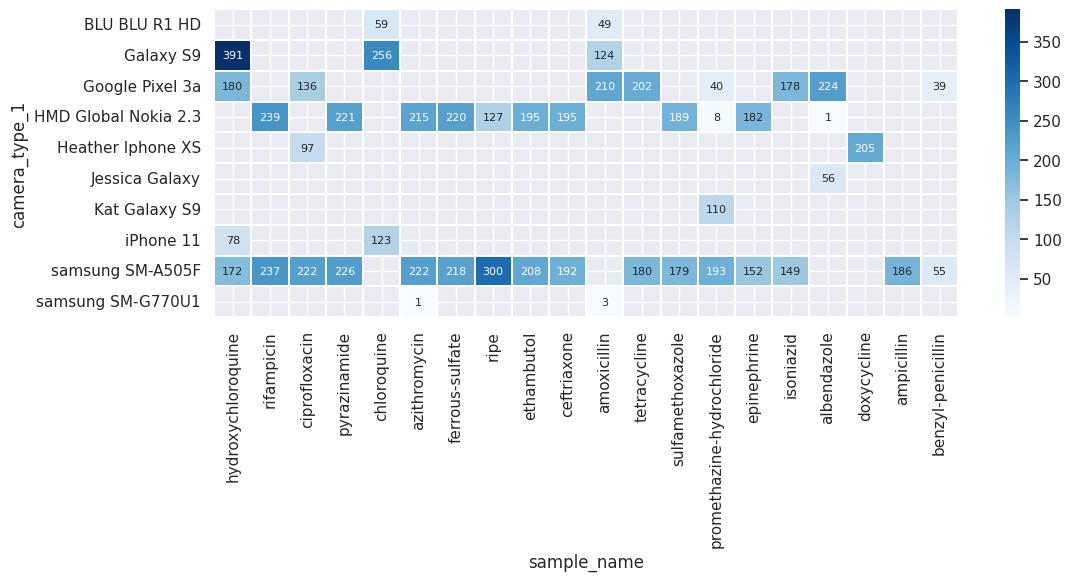

In [53]:
sample_name_list = medicine_images_counter['index'].to_list()
camera_quantity_counter = data[['camera_type_1', 'sample_name']].value_counts().reset_index(name='counts')
camera_quantity_counter_cat = camera_quantity_counter.copy()
camera_quantity_counter_cat.sample_name = pd.Categorical(camera_quantity_counter_cat['sample_name'])
camera_quantity_counter_cat.sample_name.cat.set_categories(sample_name_list, inplace=True)
# plot heatmap
table = camera_quantity_counter_cat.pivot(index="camera_type_1", columns="sample_name", values="counts")
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(table, annot=True, annot_kws={"size": 8}, fmt='g', cmap='Blues', linewidths=.3)